In [4]:
import numpy as np
import scipy as sp
from importlib import reload
import neuraltda.topology2 as tp2
import neuraltda.plotting as tpplt
import neuraltda.spikeutils as su
import glob
import os
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

# Setup figure save path
daystr = datetime.datetime.now().strftime('%Y%m%d')
figsavepth = '/home/btheilma/DailyLog/'+daystr+'/'
print(figsavepth)

/home/btheilma/DailyLog/20190408/


In [9]:
# Set up birds and block_paths
birds = ['B1083', 'B1083-2', 'B1056', 'B1235', 'B1075']
bps = {'B1083': '/home/btheilma/krista/B1083/P03S03/', 'B1075': '/home/btheilma/krista/B1075/P01S03/',
       'B1235': '/home/btheilma/krista/B1235/P02S01/', 'B1056': '/home/btheilma/krista/B1056/klusta/phy020516/Pen01_Lft_AP100_ML1300__Site03_Z2500__B1056_cat_P01_S03_1/',
       'B1056': '/home/btheilma/krista/B1056/klusta/phy020516/Pen01_Lft_AP100_ML1300__Site03_Z2500__B1056_cat_P01_S03_1/',
       'B1083-2': '/home/btheilma/krista/B1083/P03S05'}

# Binning Parameters
windt = 10.0                      # milliseconds
dtovr = 0.5*winsize               # milliseconds
segment_info = [0, 0]             # use full Trial
cluster_group = ['Good']          # use just good clusters
comment = 'Figure1'        # BootStrap Populations
bdfs = {}                         # Dictionary to store bdf

# Betti Parameters
analysis_id = 'BC'                # Generic lable
nperms = None                     # No permutation for each trial
ncellsperm = 33                   # Subsample 33 neurons from the population
dims = [0, 1, 2, 3]               # We want first four betti numbers
thresh = 4.0                     # Activation threshold
twin = np.linspace(0, 6000, 1000) # milliseconds

In [10]:
for bird in birds:
    block_path = bps[bird]
    bfdict = tp2.dag_bin(block_path, windt, segment_info, cluster_group=['Good'], dt_overlap=dtovr, comment=comment)
    bdf = glob.glob(os.path.join(bfdict['raw'], '*.binned'))[0]
    print(bdf)
    bdfs[bird] = bdf

/home/btheilma/krista/B1083/P03S03/binned_data/win-10.0_dtovr-5.0_seg-0-0-Figure1/20190408T144534Z-10.0-5.0.binned
/home/btheilma/krista/B1083/P03S05/binned_data/win-10.0_dtovr-5.0_seg-0-0-Figure1/20190408T144547Z-10.0-5.0.binned
/home/btheilma/krista/B1056/klusta/phy020516/Pen01_Lft_AP100_ML1300__Site03_Z2500__B1056_cat_P01_S03_1/binned_data/win-10.0_dtovr-5.0_seg-0-0-Figure1/20190408T144601Z-10.0-5.0.binned
/home/btheilma/krista/B1235/P02S01/binned_data/win-10.0_dtovr-5.0_seg-0-0-Figure1/20190408T144625Z-10.0-5.0.binned
/home/btheilma/krista/B1075/P01S03/binned_data/win-10.0_dtovr-5.0_seg-0-0-Figure1/20190408T144641Z-10.0-5.0.binned


In [11]:
#compute bettis:
bcurves = {}     # dictionary to store betti curves for each bird
bscurves = {}
dims = [0,1,2,3]
# Compute betti curves for each bird
for bird in birds:
    block_path = bps[bird]
    bdf = bdfs[bird]
    (bc, t, t_ms) = tp2.compute_betti_curves(analysis_id, block_path, bdf,
                                         thresh, nperms, ncellsperm,
                                         dims, twin, windt, dtovr, shuffle=False)
    # Compute the betti curves for shuffled-in-time data
    # This breaks the inter-neuronal coordination
    (bcs, ts, ts_ms) = tp2.compute_betti_curves(analysis_id, block_path, bdf,
                                            thresh, nperms, ncellsperm,
                                            dims, twin, windt, dtovr, shuffle=True)
    bcurves[bird] = bc
    bscurves[bird] = bcs

FileNotFoundError: [Errno 2] No such file or directory: '/home/btheilma/DailyLog/20190408/AllBirdsAllBettisAllStim10.0.pdf'

/home/AD/btheilma/anaconda3/envs/neuraltda-4/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['helvetica'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


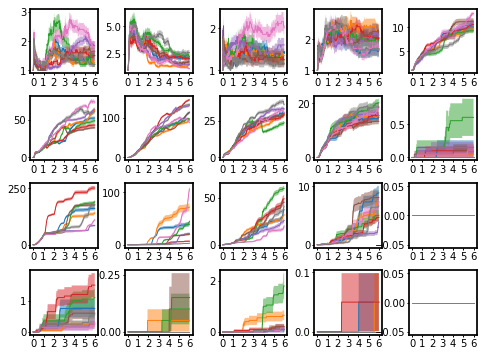

In [12]:
# generate figure and axes
from importlib import reload
reload(tpplt)
plt.style.use('/home/btheilma/code/NeuralTDA/gentnerlab.mplstyle')
fig, axs = plt.subplots(len(dims), len(birds), figsize=(8,6))
axs = axs.flatten()

for ind1, bird in enumerate(birds):
    bc = bcurves[bird]      # pull betti curves from bird
    for ind2, betti in enumerate(dims):
        
        # pull stimuli to plot
        stims = list(bc.keys())
        stims_to_plot = stims[-8:]
        
        # compute mean and stderr betti curves
        bc_bird = tp2.compute_mean_stderr_betti_curves(bc)
        
        # plot betti curve for each stimulus
        for ind, stim in enumerate(stims_to_plot):
            ax = axs[ind2*len(birds) + ind1]
            tpplt.plot_betti_curve(bc_bird, t_ms, stim, betti, ax, linewidth=1)
            for i in ax.get_xticklabels():
                i.set_fontsize(10)
                i.set_fontname('helvetica')
            for i in ax.get_yticklabels():
                i.set_fontsize(10)
                i.set_fontname('helvetica')

plt.subplots_adjust(wspace=0.4, hspace=0.35)
# Save figure
plt.savefig(os.path.join(figsavepth, 'AllBirdsAllBettisAllStim{}.pdf'.format(windt)))

In [ ]:
from ephys import core, events, rasters

bird = 'B1083'

bettis = [0,1,2,3]

block_path = bps[bird]
spikes     = core.load_spikes(block_path)
clusters   = core.load_clusters(block_path)
digmarks = events.load_events(block_path, 'DigMark')
fs         = core.load_fs(block_path)
trials     = events.load_trials(block_path)
rec        = 0 

In [ ]:
bc = bcurves[bird]
bc_bird = tp2.compute_mean_stderr_betti_curves(bc)

In [ ]:
from importlib import reload
reload(tpplt)

stim = 'N_40k'
trial = 1

plt.style.use('/home/brad/code/NeuralTDA/gentnerlab.mplstyle')
fig = plt.figure(figsize=(5,10))
ax_sound = fig.add_subplot(311)
ax_spikes = fig.add_subplot(312, sharex=ax_sound)
ax_bettis = fig.add_subplot(313, sharex=ax_sound)

# Plot sound
from scipy.signal import spectrogram
from scipy.io.wavfile import read
(rate, x) =read('/home/brad/krista_stims/{}.wav'.format(stim))
x = x / x.max()
freqs, spts, Sxx = spectrogram(x, rate, nperseg=512, nfft=512, noverlap=512-64, return_onesided=True, mode='psd')
freqs /= 1000.0
Sxx /= np.amax(Sxx)
Sxx = np.log10(Sxx)
nf, nt = np.shape(Sxx)
thresh = -np.inf
Sxx[Sxx< thresh] = thresh
ax_sound.imshow(Sxx, origin='lower', aspect='auto', extent=(0, spts[-1],0, freqs[-1]), cmap='hot', interpolation='bicubic')
ax_sound.set_ylim([0, freqs[-1]])


# plot spikes
clusters_to_plot = clusters[clusters['quality']=='Good']
rasters.plot_raster_stim_trial(spikes, trials, clusters_to_plot, stim, trial, [0, 0], rec, fs, ax=ax_spikes)
spylim = ax_spikes.get_ylim()
ax_spikes.set_yticks([1, 100])

# plot betti
orng = '#ff7f0e'
blu = '#1f77b4'
betticols = [orng, blu, blu, orng]
#first normalize the betti curves
for betti in bettis:
    tpplt.plot_normalized_betti_curve(bc_bird, t_ms, stim, betti, ax_bettis)


axs = [ax_sound, ax_spikes, ax_bettis]
for ax in axs:
    oldylim = ax.get_ylim()
    for sec in [1,2,3,4,5]:
        
        ax.plot([sec, sec], oldylim, 'k--', linewidth=2)
    ax.set_ylim(oldylim)

figpth = os.path.join(figsavepth, 'SoundSpikesBettis.pdf')
print(figpth)
plt.savefig(figpth)

In [ ]:

bird = 'B1083'

stims_to_plot = list(bcurves[bird].keys())[1:4]
# Plot real against shuffled for two stimuli
# This serves as a useful template for betti curve plottinggg
plt.style.use('/home/brad/code/NeuralTDA/gentnerlab.mplstyle')
# Generate figure and axes
fig, axs = plt.subplots(3,3, figsize=(8,6), sharey=False)
axs = axs.flatten()

betti = 1                         # Betti number to plot
bettis = [0,1,2]
stims = np.array(list(bc.keys()))  # Stimuli names
#stimIDs = ['I_40k']                # ID numbers of stimuli to plot
#stims_to_plot = stims[stimIDs]     # names of stimuli to plot
#stims_to_plot = ['I_40k']
# Compute the mean and stderr
bc_plot_dict = tp2.compute_mean_stderr_betti_curves(bcurves[bird])     # Real curves 
bcs_plot_dict = tp2.compute_mean_stderr_betti_curves(bscurves[bird])   # Shuffled curves 

# Plot the curves
for bind, betti in enumerate(bettis):
    for ind, stim in enumerate(stims_to_plot):
        ax = axs[3*bind+ind]
        tpplt.plot_betti_curve(bc_plot_dict, t_ms, stim, betti, ax)
        tpplt.plot_betti_curve(bcs_plot_dict, t_ms, stim, betti, ax)
        for i in ax.get_xticklabels():
            i.set_fontsize(14)
            i.set_fontname('helvetica')
        for i in ax.get_yticklabels():
            i.set_fontsize(14)
            i.set_fontname('helvetica')
plt.subplots_adjust(wspace=0.3, hspace=0.35)
# Save the figure
plt.savefig(os.path.join(figsavepth, 'B1083shuffleplot1.pdf'))

In [ ]:
bstyle = ['-', '-.', '-', '-.']
for betti in [0, 3]:
    tpplt.plot_betti_curve(bc_bird, t_ms, stim, betti, ax_bettis, color=betticols[betti], linestyle=bstyle[betti])
ax_bettis.tick_params('y', colors=orng)
ax_bettis2 = ax_bettis.twinx()
ax_bettis2.tick_params('y', colors=blu)
for betti in [1, 2]:
    tpplt.plot_betti_curve(bc_bird, t_ms, stim, betti, ax_bettis2, color=betticols[betti], linestyle=bstyle[betti])
  

In [ ]:
from importlib import reload
reload(tpplt)

stim = 'L_40k'
trial = 1

plt.style.use('/home/brad/code/NeuralTDA/gentnerlab.mplstyle')
fig = plt.figure(figsize=(10,8))

# plot spikes
clusters_to_plot = clusters[clusters['quality']=='Good'][10:53]
rasters.plot_raster_stim_trial(spikes, trials, clusters_to_plot, stim, trial, [0, 0], rec, fs, ax=plt.gca())
spylim = plt.gca().get_ylim()
ax = plt.gca()
ax.set_xticks([])
ax.set_yticks([])

figpth = os.path.join(figsavepth, 'sptrain_stim{}_trial{}.pdf'.format(stim, trial))
print(figpth)
plt.savefig(figpth)

In [ ]:
# Plot sound
plt.figure()
ax_sound = plt.gca()
from scipy.signal import spectrogram
from scipy.io.wavfile import read
(rate, x) =read('/home/brad/krista_stims/{}.wav'.format(stim))
x = x / x.max()
freqs, spts, Sxx = spectrogram(x, rate, nperseg=512, nfft=512, noverlap=512-64, return_onesided=True, mode='psd')
freqs /= 1000.0
Sxx /= np.amax(Sxx)
Sxx = np.log10(Sxx)
nf, nt = np.shape(Sxx)
thresh = -np.inf
Sxx[Sxx< thresh] = thresh
ax_sound.imshow(Sxx, origin='lower', aspect='auto', extent=(0, spts[-1],0, freqs[-1]), cmap='hot', interpolation='bicubic')
ax_sound.set_ylim([0, freqs[-1]])
figpth = os.path.join(figsavepth, 'spgram.pdf'.format(stim, trial))
print(figpth)
plt.savefig(figpth)